In [1]:
#本文是多元线性回归模型
import numpy as np
import matplotlib.pyplot as plt

#load data from file
#导入数据，并且观察一下
def load_data(filename):
    data = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split(',')
        col_num = len(lineArr)
        temp = []
        for i in xrange(col_num):
            temp.append(int(lineArr[i]))
        data.append(temp)
    return np.array(data)

    
data = load_data('ex1data2.txt')
print data.shape
print data[:5]

X = data[:,:-1]
y = data[:,-1:]
print X.shape
print y.shape
print X[:5]
print y[:5]



(47L, 3L)
[[  2104      3 399900]
 [  1600      3 329900]
 [  2400      3 369000]
 [  1416      2 232000]
 [  3000      4 539900]]
(47L, 2L)
(47L, 1L)
[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]]
[[399900]
 [329900]
 [369000]
 [232000]
 [539900]]


In [2]:
#feature normalize,Scale features and set them to zero mean
#定义一下特征缩放函数，因为每个特征的取值范围不同，且差异很大
def featureNormalize(X):
    X_norm = X
    mu = np.zeros((1,X.shape[1]))
    sigma = np.zeros((1,X.shape[1]))
    
    mu = np.mean(X,axis=0) #mean value of every feature
    sigma = np.std(X,axis=0)#std of every feature
    X_norm = (X - mu) / sigma
    
    return X_norm,mu,sigma 
    


    
    
    



In [10]:
X_norm,mu,sigma = featureNormalize(data[:,:-1])
num_train = X.shape[0]
one = np.ones((num_train,1))
X = np.hstack((one,X_norm))#add one
W = np.zeros((X.shape[1],1)) #初始化全0，that is ok
#计算cost
def compute_cost(X_test,y_test,theta):
    num_X = X_test.shape[0]
    cost = 0.5 * np.sum(np.square(X_test.dot(theta) - y_test)) / num_X
    return cost
#计算梯度下降
def gradient_descent(X_test,y_test,theta,alpha = 0.005,iters = 1500):
    J_history = []
    num_X = X_test.shape[0]
    for i in xrange(iters):
        theta = theta - alpha * X_test.T.dot(X_test.dot(theta) - y_test) / num_X
        cost = compute_cost(X_test,y_test,theta)
        J_history.append(cost)
    return theta,J_history
#测试一下结果
print 'run gradient descent'
theta,J_history = gradient_descent(X,y,W)
print 'Theta computed from gradient descent: ',theta


run gradient descent
Theta computed from gradient descent:  [[ 340227.89154751]
 [ 107315.97282379]
 [  -4447.3463406 ]]


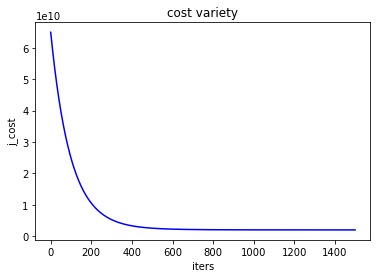

In [11]:
#plot the j_cost,绘制训练的cost曲线,可以调节学习率
import matplotlib.pyplot as plt
plt.plot(J_history,color = 'b')
plt.xlabel('iters')
plt.ylabel('j_cost')
plt.title('cost variety')
plt.show()


In [12]:
#predict (Note :normalize the feature with the train sets)
#预测一下，记得使用训练集的均值和方差去进行特征缩放
X_t = ([[1650,3]] - mu) / sigma
X_test = np.hstack((np.ones((1,1)),X_t))
predict = X_test.dot(theta)
print 'Predicted price of a 1650 sq-ft, 3 br house (using gradient descent)'
print predict


Predicted price of a 1650 sq-ft, 3 br house (using gradient descent)
[[ 293365.7762653]]


In [13]:
#compute the gradient by using Normal Equations  
#without feature scaling and gradient descent
#直接使用公式求解最佳theta,不用梯度下降法
XX = data[:,:-1]
yy = data[:,-1:]
m = XX.shape[0]

one = np.ones((m,1))
XX = np.hstack((one,data[:,:-1]))
print XX.shape
print yy.shape

def normalEquation(X_train,y_train):
    w = np.zeros((X_train.shape[0],1))
    w = ((np.linalg.pinv(X_train.T.dot(X_train))).dot(X_train.T)).dot(y_train)
    return w
w = normalEquation(XX,yy)
print 'Theta computed from the normal equations:'
print w

(47L, 3L)
(47L, 1L)


Theta computed from the normal equations:
[[ 89597.90954435]
 [   139.21067402]
 [ -8738.01911278]]


In [14]:
#predict price
price = np.dot(np.array([[1,1650,3]]),w)
print 'Predicted price of a 1650 sq-ft, 3 br house (using normal equations)'
print price


Predicted price of a 1650 sq-ft, 3 br house (using normal equations)
[[ 293081.46433506]]
